In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [3]:
Glass=pd.read_csv("/content/glass.csv")
Glass.head(20)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
Glass.shape

(214, 10)

In [5]:
array = Glass.values
X = array[:, 0:10]
Y = array[:, 9]

In [6]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [7]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [8]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y)
print(results.mean())

0.9627906976744185


In [9]:
import numpy
from sklearn.model_selection import GridSearchCV
array = Glass.values
X = array[:, 0:9]
Y = array[:, 9]

In [10]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [11]:
print(grid.best_score_)
print(grid.best_params_)


0.640531561461794
{'n_neighbors': 1}


Text(0, 0.5, 'Count')

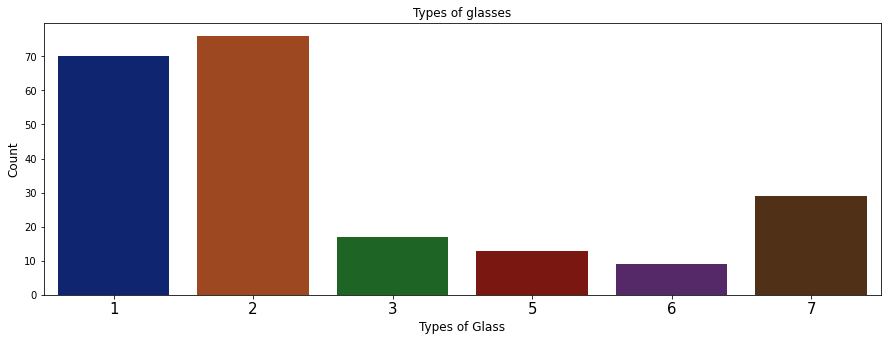

In [12]:
plt.figure(figsize=(15, 5))
    
plt.title("Types of glasses")
sns.countplot(data=Glass, x="Type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)

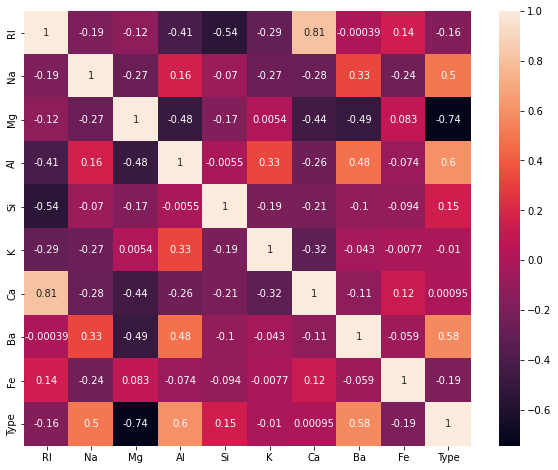

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(Glass.corr(),annot=True)

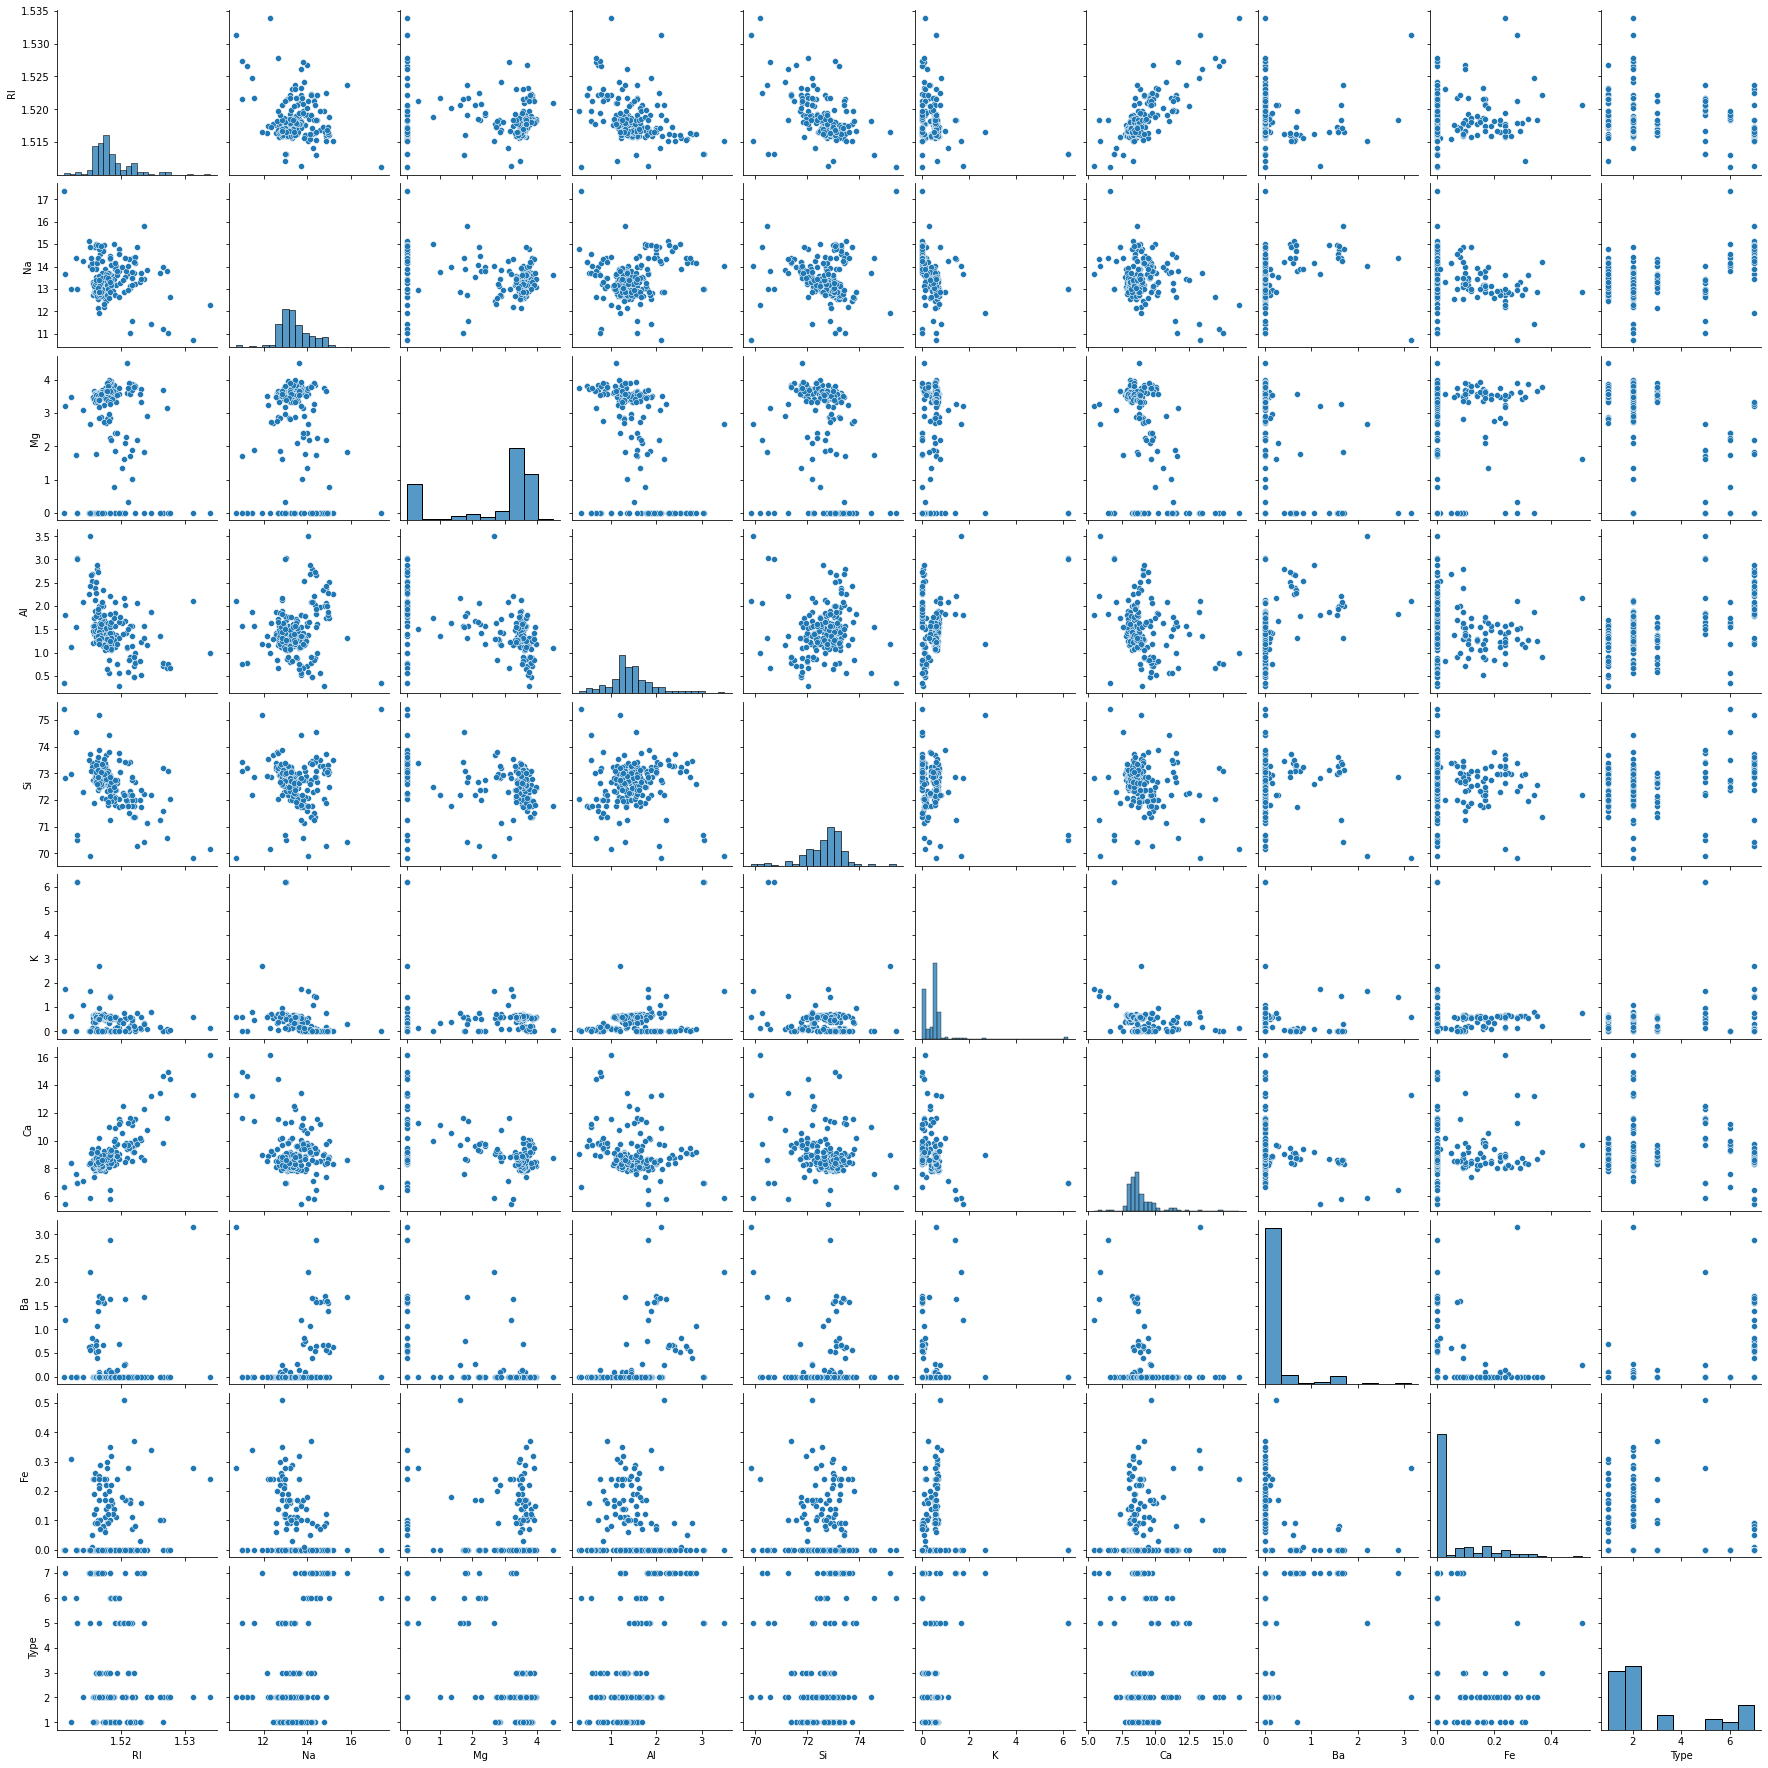

In [14]:
sns.pairplot(Glass)


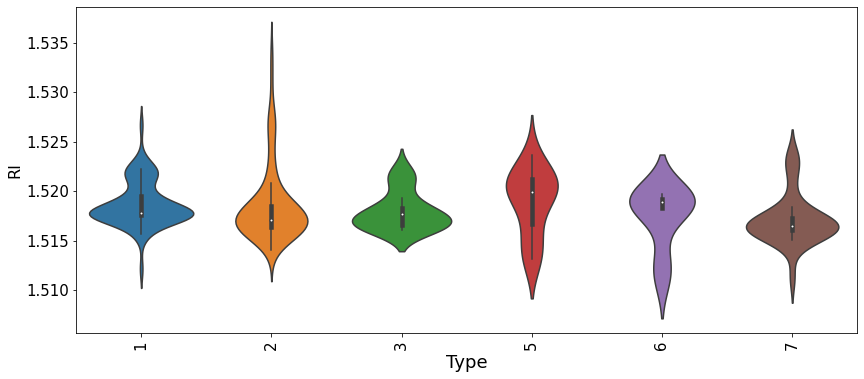

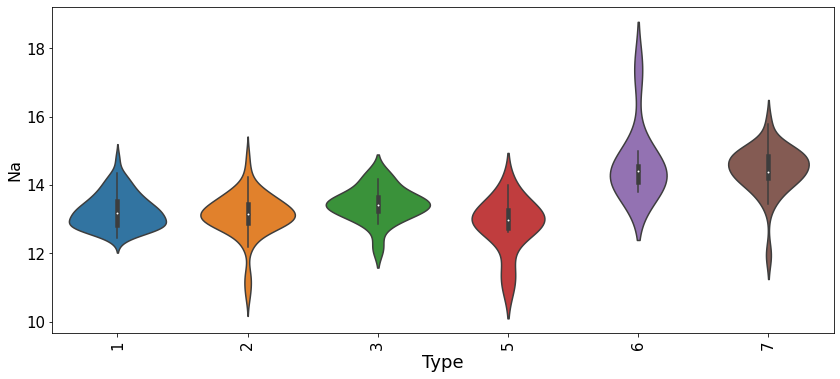

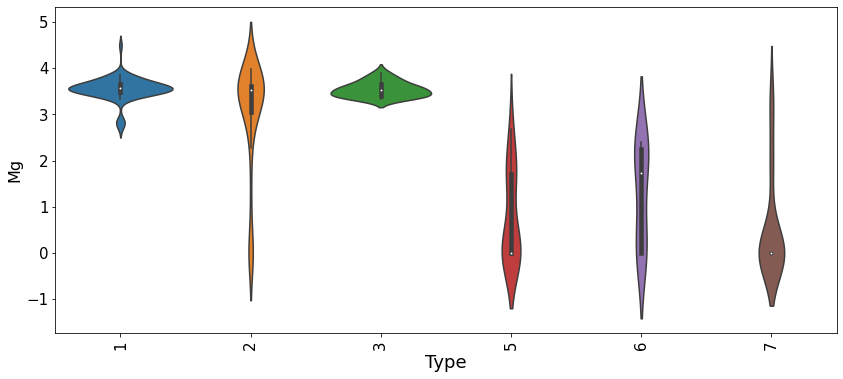

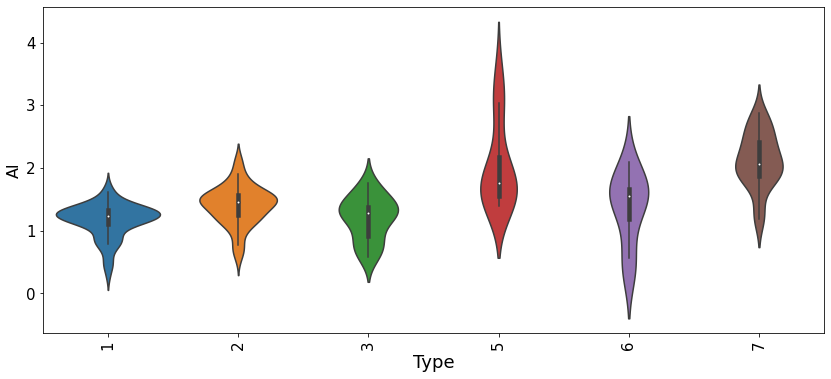

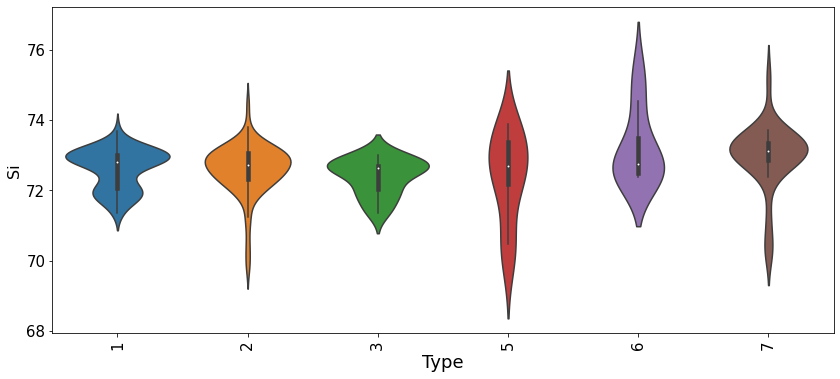

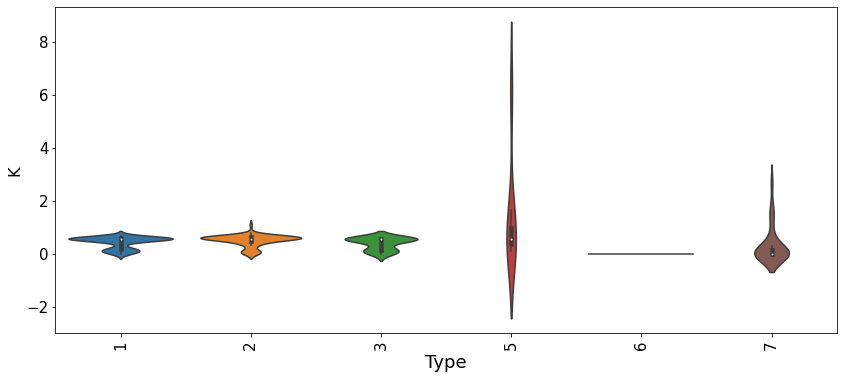

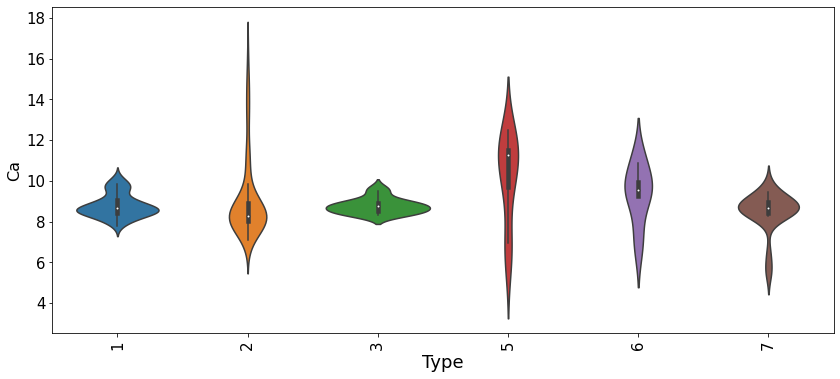

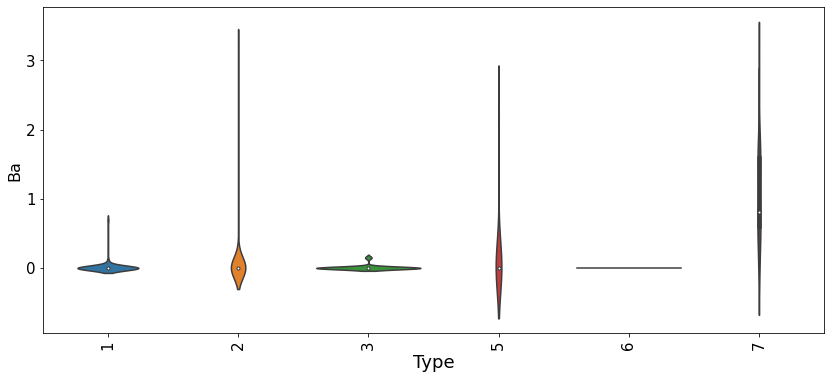

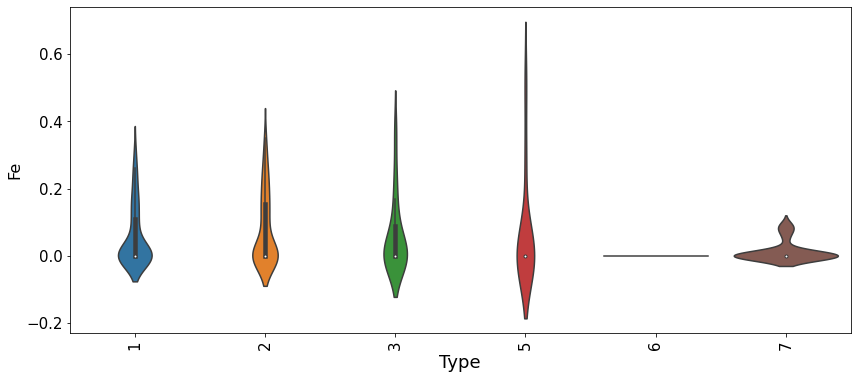

In [15]:
for i in Glass.columns[:-1]:
    plt.figure(figsize=(14,6))
    sns.violinplot(x = 'Type', y= i,data = Glass)
    plt.xticks(rotation = 90, size = 15)
    plt.yticks(size = 15)
    plt.xlabel('Type',fontsize=18)
    plt.ylabel(i, fontsize=16)

    plt.show()

Text(0.5, 1.0, 'Correlation with Glass type \n')

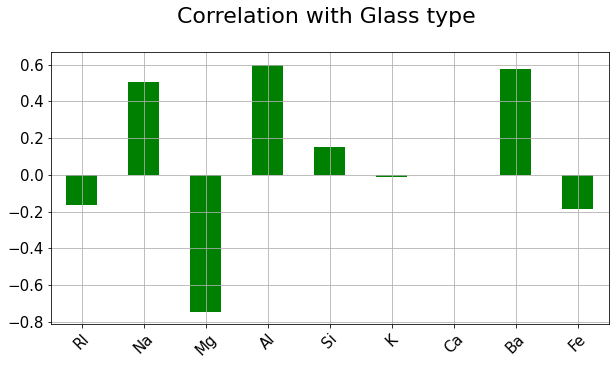

In [16]:
Data = Glass.iloc[:,:-1]

correlations = Data.corrwith(Glass.Type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'green',
        rot = 45, grid = True)
plt.title('Correlation with Glass type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(Glass.drop('Type',axis=1))
data_head=pd.DataFrame(scaled_features,columns=Glass.columns[:-1])
data_head.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_head,Glass['Type'], test_size=0.3, random_state=42)


In [19]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


In [20]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [21]:
pred = model.predict(X_test)
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.6461538461538462


In [22]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.650952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report                precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65



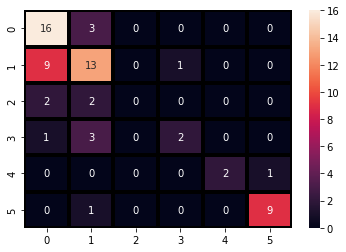

In [23]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [24]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    error_rate.append(np.mean(predict!=y_test))

Text(0, 0.5, 'Error Rate')

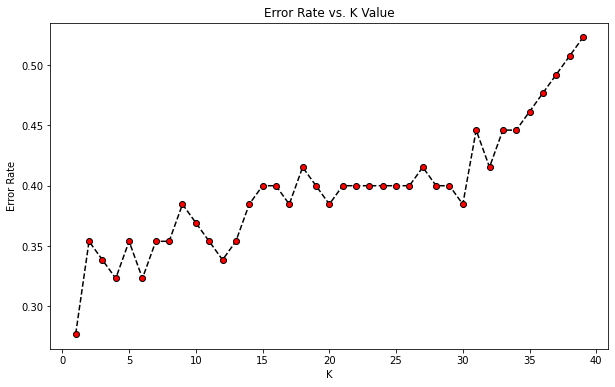

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

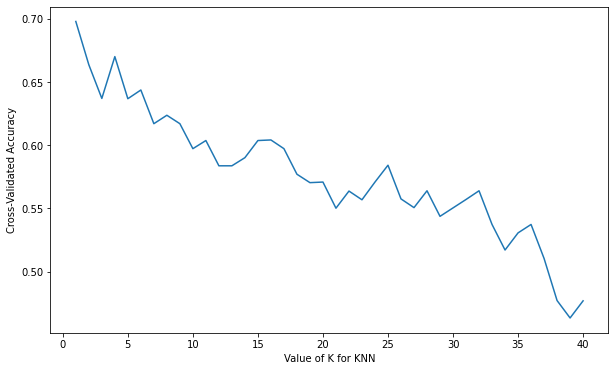

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
pred_knn=knn_model.predict(X_test)

acc_knn= accuracy_score(y_test,pred_knn)
print("The accuracy is  {}".format(acc_knn))


The accuracy is  0.676923076923077


In [28]:
kfold_knn = KFold(n_splits=10)
results_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold_knn)
print(results_knn.mean())

0.7042857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report                precision    recall  f1-score   support

           1       0.59      0.89      0.71        19
           2       0.62      0.57      0.59        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.68        65
   macro avg       0.66      0.62      0.60        65
weighted avg       0.67      0.68      0.65        65



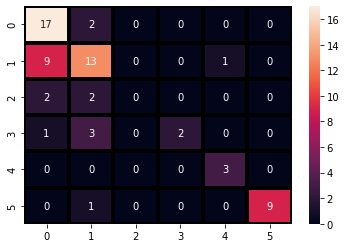

In [29]:
sns.heatmap(confusion_matrix(y_test, pred_knn),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_knn))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


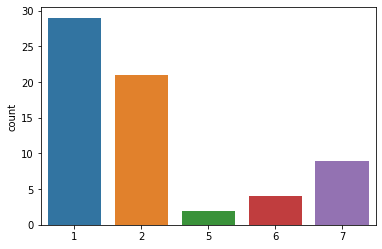

In [30]:
sns.countplot(pred_knn)


In [31]:
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10,cv=kf, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)


Fitting 15 folds for each of 24 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/n

In [32]:
gs_results.best_score_

0.711851851851852

In [33]:
model_final = gs_results.best_estimator_
model_final


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [34]:
gs_results.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             verbose=10)>

In [35]:
pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  0.7538461538461538


Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.75      0.65      0.70        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.75        65
   macro avg       0.77      0.75      0.74        65
weighted avg       0.77      0.75      0.75        65



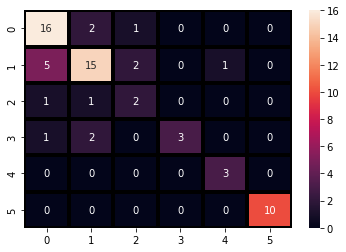

In [36]:
sns.heatmap(confusion_matrix(y_test, pred_final),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


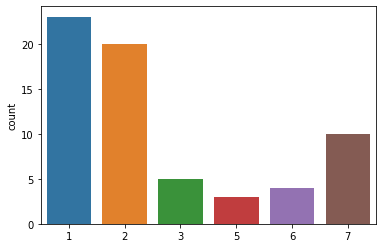

In [37]:
sns.countplot(pred_final)


In [38]:
X_train.iloc[:, 0]


137   -0.414363
65     0.866266
108    1.272239
181    0.169842
31    -0.295542
         ...   
106    4.252673
14    -0.242732
92    -0.820336
179    0.051020
102   -0.054599
Name: RI, Length: 149, dtype: float64